In [1]:
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *
from sklearn.preprocessing import OneHotEncoder
from utils import *
from VAE import *

In [2]:
X_train, y_train = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                                   labels_path='train-labels-idx1-ubyte')

X_train = X_train[:10000]
X_train = np.where(X_train > 127, 1, 0)

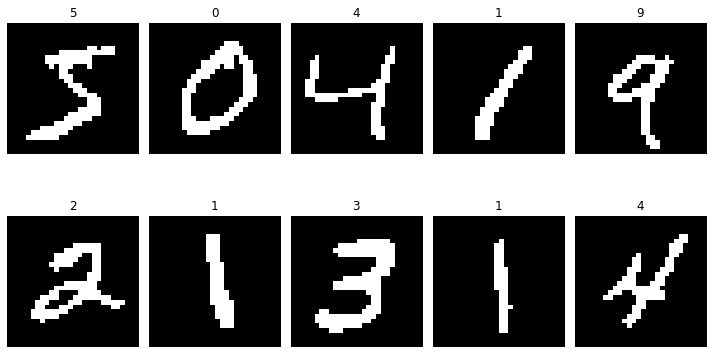

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(10,6))
ax = ax.ravel()
for i in range(10):
  ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
  ax[i].set_title(y_train[i])
  ax[i].axis('off')
fig.tight_layout()

Epoch 1 out of 100, loss: 0.030647716666233286
Epoch 20 out of 100, loss: 0.008629490560880079
Epoch 40 out of 100, loss: 0.005466468671846147
Epoch 60 out of 100, loss: 0.004153672027292295
Epoch 80 out of 100, loss: 0.003429437108662236
Epoch 100 out of 100, loss: 0.0029844758174445837


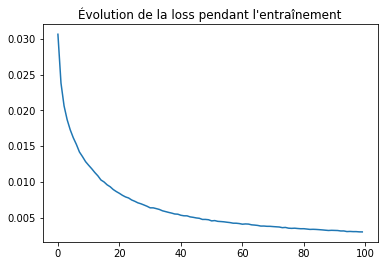

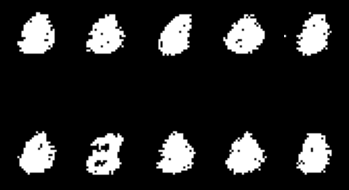

In [52]:
# Valeurs des hyper paramètres et entrainement
p = 784  # (égal à 28 * 28, la taille de l'image)
q = 600
rbm = RBM(p, q) # la taille du réseau est donc 784 * 600 = 470 400

epochs = 100
learning_rate = 0.01
batch_size = 32

RBM_trained, loss = rbm.train_RBM(X_train, epochs, learning_rate, batch_size, verbose=True)

plt.plot(loss)
plt.title("Évolution de la loss pendant l'entraînement")
plt.show()

n_iter = 1000
n_imgs = 10
RBM_trained.generer_image_RBM(n_imgs, n_iter, dataset='mnist')

Epoch 1 out of 100, loss: 0.052745610503272734
Epoch 20 out of 100, loss: 0.01808774129825171
Epoch 40 out of 100, loss: 0.013821278814609525
Epoch 60 out of 100, loss: 0.011742917132104836
Epoch 80 out of 100, loss: 0.010404185857261612
Epoch 100 out of 100, loss: 0.009455860754808415
Epoch 1 out of 100, loss: 0.12290566440169882
Epoch 20 out of 100, loss: 0.051471242119234546
Epoch 40 out of 100, loss: 0.042898531388931
Epoch 60 out of 100, loss: 0.039055995546075195
Epoch 80 out of 100, loss: 0.03674056036462463
Epoch 100 out of 100, loss: 0.03510365098893925
Epoch 1 out of 100, loss: 0.14819460122702316
Epoch 20 out of 100, loss: 0.07389401647050102
Epoch 40 out of 100, loss: 0.06675857231963005
Epoch 60 out of 100, loss: 0.06404707439781093
Epoch 80 out of 100, loss: 0.06248500351969254
Epoch 100 out of 100, loss: 0.061511419733649965


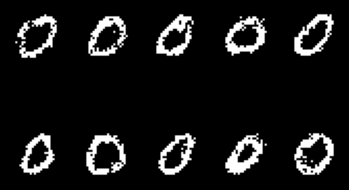

In [31]:
neurons = [X_train[0].shape[0], 400, 300, 100] 
# taille du réseau: 784 * 400 + 400 * 300 + 300 * 100 = 463 600
dbn = DBN(neurons)
dbn, losses = dbn.pretrain_DBN(X_train, n_epoch=100, lr_rate=0.001)
n_iter = 1000
n_imgs = 10
generated = dbn.generer_image_DBN(n_imgs, n_iter=n_iter, dataset='mnist')

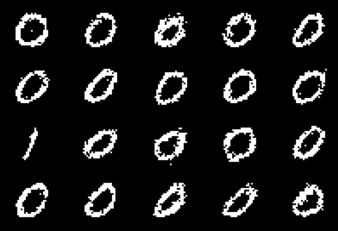

In [51]:
generated = dbn.generer_image_DBN(20, n_iter=n_iter, dataset='mnist')

# Parfois besoin de relancer beaucoup de fois la cellule pour obtenir d'autres
# chiffres que des zéros

In [4]:
# build model
vae = VAE(x_dim=784, h_dim1=256, h_dim2=128, z_dim=2)
# taille du modèle: Partie encodeur -> 784 * 256 + 256 * 128 + 128 * 2 * 2  
#                   Partie décodeur -> 2 * 128 + 128 * 256 + 256 * 784
# taille totale: 476 584
#
if torch.cuda.is_available():
    vae.cuda()

optimizer = optim.Adam(vae.parameters(), lr=1e-3)
train_loader = array_to_dataloader(X_train)

for epoch in range(1, 51):
    train(vae, train_loader, optimizer, epoch)

====> Epoch: 1 Average loss: 169.7380
====> Epoch: 2 Average loss: 156.8531
====> Epoch: 3 Average loss: 152.1337
====> Epoch: 4 Average loss: 149.8108
====> Epoch: 5 Average loss: 148.3393
====> Epoch: 6 Average loss: 146.8149
====> Epoch: 7 Average loss: 146.1408
====> Epoch: 8 Average loss: 145.5150
====> Epoch: 9 Average loss: 144.8762
====> Epoch: 10 Average loss: 144.5030
====> Epoch: 11 Average loss: 144.0532
====> Epoch: 12 Average loss: 143.9150
====> Epoch: 13 Average loss: 143.5251
====> Epoch: 14 Average loss: 143.1271
====> Epoch: 15 Average loss: 142.8355
====> Epoch: 16 Average loss: 142.5768
====> Epoch: 17 Average loss: 142.3072
====> Epoch: 18 Average loss: 142.5222
====> Epoch: 19 Average loss: 141.8612
====> Epoch: 20 Average loss: 141.9091
====> Epoch: 21 Average loss: 141.7195
====> Epoch: 22 Average loss: 141.5766
====> Epoch: 23 Average loss: 141.0802
====> Epoch: 24 Average loss: 140.8520
====> Epoch: 25 Average loss: 140.9494
====> Epoch: 26 Average loss: 140.

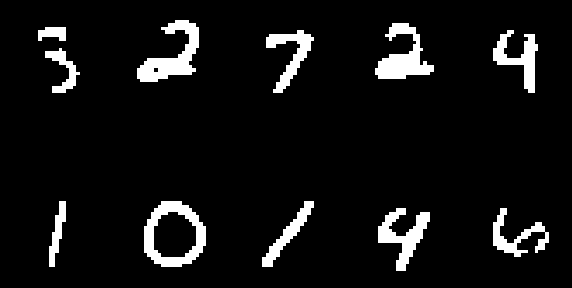

In [30]:
n_imgs = 10

fig, ax = plt.subplots(2, 5, figsize=(10, 6))
fig.patch.set_facecolor('black')
ax = ax.ravel()
with torch.no_grad():
    if torch.cuda.is_available():
        z = torch.randn(n_imgs, 2).cuda()
        sample = vae.decoder(z).cuda()
    else:
        z = torch.randn(n_imgs, 2)
        sample = vae.decoder(z)
    for i, img in enumerate(sample.view(10, 1, 28, 28)):
      img = img[0].numpy()
      img = 1 * (img >= 0.5)
      ax[i].imshow(img, cmap='gray')
      ax[i].axis('off')
plt.savefig('VAE generated digits.jpg')
plt.show()